# Solving for current in R-L circuit

In [70]:
#importing all required modules
%matplotlib inline 
import numpy as np
from scipy.integrate import odeint, ode, cumtrapz
import matplotlib.pyplot as plt
from math import pi, sin, atan
import seaborn as sns

Auxiliary variables definition

In [228]:
# RMS value of voltage
u = 230 

#time vector
t = np.linspace(0,0.3, 1000)

#frequency & angular frequency
f = 50
omega = 2 * pi * f

#Resitance
R = 5

#Inductance
L = 0.1
XL = 2*pi*f*L

#Phase angle
phi=atan(XL/R)

#closing angle [rad]
alpha = 0

Definition of voltage

In [229]:
ua = [np.sqrt(2)*u*sin(omega*k + alpha) for k in t]

In [230]:
def di(x,t):
    #for this function i = p
    #initial condition
    p = x[0]
    #di function
    dp = 1/L*(np.sqrt(2)*u*sin(omega*t + alpha) - R*p)
    
    return dp

In [231]:
#initial state
x0 = 0

In [232]:
ia = odeint(di, x0, t)

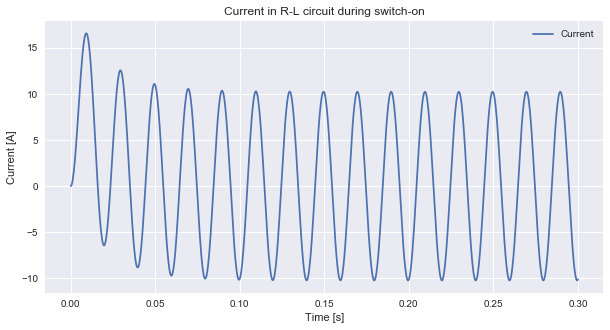

In [233]:
plt.figure(figsize=(10,5))
plt.plot(t,ia, label="Current")
plt.ylabel("Current [A]")
plt.xlabel("Time [s]")
plt.title("Current in R-L circuit during switch-on")
plt.legend();

In [234]:
# resistor voltage
uR = R*ia

# line voltage 
U = np.array([np.sqrt(2)*u*sin(omega*k + alpha) for k in t])
# inductor voltage
uL = [U[k] - uR[k] for k in range(len(U))]

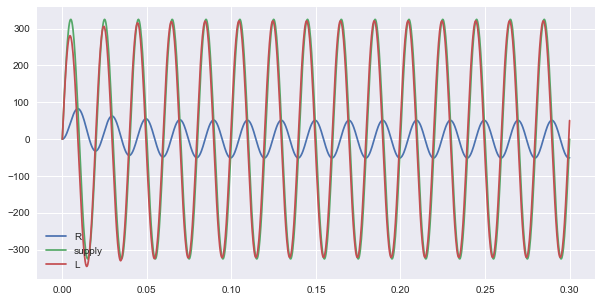

In [235]:
plt.figure(figsize=(10,5))
plt.plot(t, uR, label='R')
plt.plot(t, U, label='supply')
plt.plot(t, uL, label='L')
plt.legend();